In [ ]:
############### Applied t-test on Gender ################


In [1]:
#path = '#filename = 'final_csv.csv'
import pandas as pd
import datetime as dt
import pickle
import numpy as np
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
data=pd.read_csv(path+filename,encoding='ISO-8859-1',low_memory=False)
#data.dtypes
#sns.pairplot(data[['Target','prc_chg_dollar']],hue='Target')
numeric_col=['prc_old','qty_old','amt_old','r_qty_old','r_amt_old','prc_chg_dollar']
ignore_col=['ETL_PRG_NM','FRST_NM','prc_chg_pct','return_duration_from_recent_buy','ETL_BATCH_ID','ETL_UPD_TS','ETL_CRT_TS','BEST_PHN_TYP_CD','SRC_SYS_ID','VLD_EMAIL_ADDR_IND','SUPPR_DMA_MAIL_IND','SEC_NBR_NOT_FND_IND','SEASNL_IND','RTRN_MAIL_IND','NCOA_MOVE_TYP_CD','MISS_SECDRY_NBR_HIRIS_IND','LOT_CD','LAT_LONG_LVL_CD','LONG_NBR','LAT_NBR','FIPS_STT_CD','FIPS_PLACE_CD','FIPS_MIN_CVL_DIVN_CD','FIPS_CNTY_CD','DPB_NBR','DLVR_SEQ_FILE_DLVR_TYP_CD','CUST_SEC_IND','CNSS_TRACT_TXT','CNSS_PLACE_CD','CNSS_TRACT_CD','CNSS_MIN_CVL_DIVN_CD','CNSS_BLOCK_GRP_CD','CMPND_GRP_CD','CBSA_CD','CARR_RTE_CD','BEST_EMAIL_SRC_EMAIL_ADDR_TXT','BEST_EMAIL_ADDR_TXT','BEST_PHN_SRC_PHN_NBR','BEST_PHN_NBR','OUTLET_SMS_IND','ADDR_UPD_TS','ADDR_UPD_NCOA_TS','CNTRY_CD','PROV_CD','ZIP_CD','ADDR_LN_2_TXT','ADDR_LN_1_TXT','ALT_LANG_CD','EMP_IND','EMP_CD','BIRTH_MNTH_CD','DOB_DT','TTL_DESC','MDDL_NM','MDDL_INIT_NM','LST_NM','LBL_NM','MDSE_DEPT_DESC','PROD_DESC','web_prod_id']
Dates_col=['buy_dt_old','r_dt_old','buy_dt_new','r_dt_new']
ignore_col.extend(Dates_col)
predictors=[col for col in data.columns if col not in ignore_col]

In [7]:
data1=data[predictors]

In [8]:
data1.dropna(subset=['PROD_TYP_DESC','BRND_NM','VND_NM','GMM_DESC','PARENT_MDSE_DIVN_DESC','BUYER_DESC'],how='any',inplace=True)
data1.dropna(subset=['GNDR_CD','FED_EMP_IND','ACCT_ADDR_RECD_TYP_CD','CITY_NM','STT_CD','ZIP4_CD','MBL_PHN_IND','SMS_IND','DLVR_SEQ_FILE_DLVR_IND_CD','DLVR_SEQ_FILE_DLVR_IND_CD_DESC','DLVR_SEQ_FILE_DLVR_TYP_CD_DESC','DRCT_MKTNG_ASSOCTN_CD','MOVE_CD','ERCPT_CD','VACNT_IND','AFLT_IND','SRC_DEL_IND'],how='any',inplace=True)

############################ t - test and Anova - test (On Gender) #########################

In [2]:
from scipy import stats
import numpy as np
from scipy import stats

In [3]:
data1.loc[data1.GNDR_CD=='0','GNDR_CD']='NAN'
data1.dropna(subset=['GNDR_CD'],how='any',inplace=True)

NameError: name 'data1' is not defined

In [13]:
unqs=pd.unique(data1.Target.values) 
t_data={unq:data1['prc_chg_dollar'][data1.Target==unq]for unq in unqs}
stats.ttest_ind(t_data['Return_Yes'],t_data['Return_No'])              #### T - test on Return ###


Ttest_indResult(statistic=-13.978331036895021, pvalue=6.2859185753191835e-44)

In [21]:
##one way ANNOVA for all categories 
stats.f_oneway(t_gender['F'],t_gender['M'],t_gender['U'])

F_onewayResult(statistic=0.25230179463958446, pvalue=0.77701587976308861)

############## GMM - DESC #####

In [16]:
#### T - test on GMM_Desc ####
#unqs=pd.unique(data1.GMM_DESC.values)
#t_GMM={unq:data1['prc_chg_dollar'][data1.GMM_DESC==unq]for unq in unqs}
#stats.ttest_ind(t_GMM['READY TO WEAR'],t_GMM['MENS & KIDS'],t_GMM['HOME'],t_GMM['CENTER CORE'])
#stats.f_oneway(t_GMM['READY TO WEAR'],t_GMM['MENS & KIDS'],t_GMM['COST/WORKROOM/LEASE'],t_GMM['MISCELLANEOUS'],t_GMM['HOME'])
#stats.f_oneway(t_GMM['READY TO WEAR'],t_GMM['CENTER CORE'])
#stats.f_oneway(t_GMM['MENS & KIDS'],t_GMM['COST/WORKROOM/LEASE'],t_GMM['MISCELLANEOUS'],t_GMM['HOME'])


#### Merged RFM_Score with customer data and new_repurchase ##########

In [4]:
path = 'C:\\Users\\Admin\\WHISK SOFTWARE PVT. LTD\\Vaibhav Sahu - Macys_Repurchase\\Ashwini\\Trials\\'
filename = 'Customer_data.csv'
filename2='RFM_score_data.csv'
filename5='new_repurchase_product_unique.csv'

In [5]:
###################################3
#data2=pd.read_csv(path+filename,encoding='ISO-8859-1',low_memory=False)  ### reading the data ###
#data3=pd.read_csv(path+filename2,encoding='ISO-8859-1',low_memory=False)
#data4=data2.merge(data3,left_on="INDIV_ID",right_on="INDIV_ID",how="inner")   ### Merging the data ###

In [5]:
############################
datax=pd.read_csv(path+filename2,encoding='ISO-8859-1',low_memory=False) ## read RFM data ##
datay=pd.read_csv(path+filename5,encoding='ISO-8859-1',low_memory=False)##  Read new_rep_pro ##
dataa=datax.merge(datay,left_on='INDIV_ID',right_on="cid",how="inner")
#print(data2.shape)
#print(data3.shape)
#print(data4.shape)
#print(data_f.shape)
#data5=pd.read_csv(path+filename5,encoding='ISO-8859-1',low_memory=False)
#print(data5.shape)
#data5.merge(data4,left_on="cid",right_on="INDIV_ID",how="inner").shape

In [6]:
dataz=pd.read_csv(path+filename,encoding='ISO-8859-1',low_memory=False)
data_f=dataa.merge(dataz,left_on="INDIV_ID",right_on="INDIV_ID",how="inner")
#data_f.to_csv('data_merge.csv')

In [7]:
data_f.shape

(7251, 200)

In [8]:
#### Derive Target Variable ###
data_f.loc[data_f.return_status=='Returned New','return_status']='Return_yes'
data_f.loc[data_f.return_status=='Returned Old','return_status']='Return_yes'
data_f.loc[data_f.return_status=='Both Returned','return_status']='Return_yes'
data_f.loc[data_f.return_status=='Both Kept','return_status']='Return_No'
#data_f.to_csv('data_merge.csv')

In [9]:
data_f['return_status'].value_counts()

Return_yes    3779
Return_No     3472
Name: return_status, dtype: int64

#### T- test on GMM_DESC Vs prc_chg_dollars

In [45]:
GMM=data_f[data_f['GMM_DESC']=='CENTER CORE'][['prc_chg_dollar','return_status']]
t1,p1=stats.ttest_ind(GMM[GMM['return_status']=='Return_yes']['prc_chg_dollar'],GMM[GMM['return_status']=='Return_No']['prc_chg_dollar'])
print(t1,p1)
print("CENTER CORE - it is having significant difference between price changes,we are rejecting Null- hyp")
print('--------------')
GMM=data_f[data_f['GMM_DESC']=='MISCELLANEOUS'][['prc_chg_dollar','return_status']]
t2,p2=stats.ttest_ind(GMM[GMM['return_status']=='Return_yes']['prc_chg_dollar'],GMM[GMM['return_status']=='Return_No']['prc_chg_dollar'])
print(t2,p2)
print("MISCELLANEOUS - it is not having  significant difference between price changes, accept null hyp")
print('--------------')
GMM=data_f[data_f['GMM_DESC']=='READY TO WEAR'][['prc_chg_dollar','return_status']]
t3,p3=stats.ttest_ind(GMM[GMM['return_status']=='Return_yes']['prc_chg_dollar'],GMM[GMM['return_status']=='Return_No']['prc_chg_dollar'])
print(t3,p3)
print("READY TO WEAR - it is having significant difference between price changes,we are rejecting Null- hyp")
print('--------------')
GMM=data_f[data_f['GMM_DESC']=='HOME'][['prc_chg_dollar','return_status']]
t4,p4=stats.ttest_ind(GMM[GMM['return_status']=='Return_yes']['prc_chg_dollar'],GMM[GMM['return_status']=='Return_No']['prc_chg_dollar'])
print(t4,p4)
print("HOME - it is having significant difference between price changes,we are rejecting Null- hyp")
print('--------------')
GMM=data_f[data_f['GMM_DESC']=='COST/WORKROOM/LEASE'][['prc_chg_dollar','return_status']]
t5,p5=stats.ttest_ind(GMM[GMM['return_status']=='Return_yes']['prc_chg_dollar'],GMM[GMM['return_status']=='Return_No']['prc_chg_dollar'])
print(t5,p5)
print("COST/WORKROOM/LEASE - it is not a significant difference between price changes, accept null hyp")
print('--------------')
GMM=data_f[data_f['GMM_DESC']=='BEAUTY'][['prc_chg_dollar','return_status']]
t6,p6=stats.ttest_ind(GMM[GMM['return_status']=='Return_yes']['prc_chg_dollar'],GMM[GMM['return_status']=='Return_No']['prc_chg_dollar'])
print(t6,p6)
print("BEAUTY - it is not a significant difference between price changes,we are accepting the Null- hyp")

-5.11270441989 3.59910088103e-07
CENTER CORE - it is having significant difference between price changes,we are rejecting Null- hyp
--------------
-0.0923379346592 0.927953187213
MISCELLANEOUS - it is not having  significant difference between price changes, accept null hyp
--------------
-6.90558107254 6.40260738068e-12
READY TO WEAR - it is having significant difference between price changes,we are rejecting Null- hyp
--------------
-2.15388516563 0.0314473259744
HOME - it is having significant difference between price changes,we are rejecting Null- hyp
--------------
-1.24571120874 0.215999670418
COST/WORKROOM/LEASE - it is not a significant difference between price changes, accept null hyp
--------------
-1.66796105497 0.0956849680399
BEAUTY - it is not a significant difference between price changes,we are accepting the Null- hyp


##### T- test  on  PROD_TYP_DESC  #######################

In [175]:
PROD_TYPE=data_f[data_f['PROD_TYP_DESC']=='TOP'][['prc_chg_dollar','return_status']]
t1,p1=stats.ttest_ind(PROD_TYPE[PROD_TYPE['return_status']=='Return_yes']['prc_chg_dollar'],PROD_TYPE[PROD_TYPE['return_status']=='Return_No']['prc_chg_dollar'])
print(t1,p1)
print("PROD_TYPE (TOP) - IT is a significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP ")

PROD_TYPE=data_f[data_f['PROD_TYP_DESC']=='DRESS'][['prc_chg_dollar','return_status']]
t2,p2=stats.ttest_ind(PROD_TYPE[PROD_TYPE['return_status']=='Return_yes']['prc_chg_dollar'],PROD_TYPE[PROD_TYPE['return_status']=='Return_No']['prc_chg_dollar'])
print(t2,p2)
print("PROD_TYPE (DRESS) - it is having significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP ")

-2.83066177864 0.00477633463273
PROD_TYPE (TOP) - IT is a significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP 
-2.1021399584 0.0362352063074
PROD_TYPE (DRESS) - it is having significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP 


In [176]:
PROD_GMM=data_f[data_f['PROD_TYP_DESC']=='TOP'][['prc_chg_dollar','GMM_DESC']]
t1,p1=stats.ttest_ind(PROD_GMM[PROD_GMM['GMM_DESC']=='READY TO WEAR']['prc_chg_dollar'],PROD_GMM[PROD_GMM['GMM_DESC']=='MENS & KIDS']['prc_chg_dollar'])
print(t1,p1)
print("PROD_TYP(TOP) VS GMM_DESC - there is not a significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP ")

-1.38702633458 0.165872706018
PROD_TYP(TOP) VS GMM_DESC - there is not a significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP 


##### T - test on  RFM ###################

In [120]:
#pd.unique(data_f.R_SCR_NBR.values)
data_f.dropna(subset=['R_SCR_NBR'],how='any',inplace=True)

array([  5.,   4.,   3.,   2.,   1.,   0.,  nan])

In [165]:
unqs=pd.unique(data_f.R_SCR_NBR.values)
t_R_SCR_NBR={unq:data_f['prc_chg_dollar'][data_f.R_SCR_NBR==unq]for unq in unqs}   
print(stats.f_oneway(t_R_SCR_NBR[1],t_R_SCR_NBR[2],t_R_SCR_NBR[3],t_R_SCR_NBR[4],t_R_SCR_NBR[5]))
print("test on redundency - there is not a significance difference ")

unqsf=pd.unique(data_f.F_SCR_NBR.values)
t_F_SCR_NBR={unq:data_f['prc_chg_dollar'][data_f.F_SCR_NBR==unq]for unq in unqsf}  
print(stats.f_oneway(t_F_SCR_NBR[1],t_F_SCR_NBR[2],t_F_SCR_NBR[3],t_F_SCR_NBR[4],t_F_SCR_NBR[5]))
print("test on frequency - there is not a significance difference ")

unqs=pd.unique(data_f.CURR_DH_MY_LIFE_CD.values)
t_CURR_DH_MY_LIFE_CD={unq:data_f['prc_chg_dollar'][data_f.CURR_DH_MY_LIFE_CD==unq]for unq in unqs}   
print(stats.f_oneway(t_CURR_DH_MY_LIFE_CD[1],t_CURR_DH_MY_LIFE_CD[2],t_CURR_DH_MY_LIFE_CD[3],t_CURR_DH_MY_LIFE_CD[4],t_CURR_DH_MY_LIFE_CD[5],t_CURR_DH_MY_LIFE_CD[6],t_CURR_DH_MY_LIFE_CD[9]))
print("test on CURR_DH_MY_LIFE_CD - there is not a significance difference ")

#CURR_DH_SHOP_HABIT_CD
unqs=pd.unique(data_f.CURR_DH_SHOP_HABIT_CD.values)
t_CURR_DH_SHOP_HABIT_CD={unq:data_f['prc_chg_dollar'][data_f.CURR_DH_SHOP_HABIT_CD==unq]for unq in unqs}   
print(stats.f_oneway(t_CURR_DH_SHOP_HABIT_CD['A'],t_CURR_DH_SHOP_HABIT_CD['B'],t_CURR_DH_SHOP_HABIT_CD['C'],t_CURR_DH_SHOP_HABIT_CD['D'],t_CURR_DH_SHOP_HABIT_CD['E'],t_CURR_DH_SHOP_HABIT_CD['X']))
print("test on CURR_DH_MY_LIFE_CD - there is not a significance difference ")

F_onewayResult(statistic=1.3871549409509605, pvalue=0.2356063428466264)
test on redundency - there is not a significance difference 
F_onewayResult(statistic=1.1531695304776091, pvalue=0.32949061903085181)
test on frequency - there is not a significance difference 
F_onewayResult(statistic=1.2779838326269712, pvalue=0.26361116909839599)
test on CURR_DH_MY_LIFE_CD - there is not a significance difference 
F_onewayResult(statistic=1.3430177267213184, pvalue=0.2428450392526611)
test on CURR_DH_MY_LIFE_CD - there is not a significance difference 


In [163]:
PROD_GMM=data_f[data_f['GMM_DESC']=='READY TO WEAR'][['prc_chg_dollar','CURR_DH_SHOP_HABIT_CD']]
t1,p1=stats.ttest_ind(PROD_GMM[PROD_GMM['CURR_DH_SHOP_HABIT_CD']=='A']['prc_chg_dollar'],PROD_GMM[PROD_GMM['CURR_DH_SHOP_HABIT_CD']=='B']['prc_chg_dollar'])
print(t1,p1)
#print("there is not a significant difference b/w price changes w.r.t PROD_TYP_DESC-TOP ")

0.0862819592072 0.931253416185


In [ ]:
############ T - test on "Active_Online_Purchase" ############

In [25]:
unqsf=pd.unique(data_f.F_SCR_NBR.values)
t_F_SCR_NBR={unq:data_f['Active_Online_Purchase'][data_f.F_SCR_NBR==unq]for unq in unqsf}   
print(stats.f_oneway(t_F_SCR_NBR[0],t_F_SCR_NBR[1],t_F_SCR_NBR[2],t_F_SCR_NBR[3],t_F_SCR_NBR[4],t_F_SCR_NBR[5]))
print("test on frequency - there is a significance difference ")

print("-----------------")

unqs=pd.unique(data_f.R_SCR_NBR.values)
t_R_SCR_NBR={unq:data_f['Active_Online_Purchase'][data_f.R_SCR_NBR==unq]for unq in unqs}  
print(stats.f_oneway(t_R_SCR_NBR[0],t_R_SCR_NBR[1],t_R_SCR_NBR[2],t_R_SCR_NBR[3],t_R_SCR_NBR[4],t_R_SCR_NBR[5]))
print("test on recency - there is a significance difference ")

print("-----------------")

unqs=pd.unique(data_f.M_SCR_NBR.values)
t_M_SCR_NBR={unq:data_f['Active_Online_Purchase'][data_f.M_SCR_NBR==unq]for unq in unqs}   ### T - test on GNDR_CD ###
print(stats.f_oneway(t_M_SCR_NBR[0],t_M_SCR_NBR[1],t_M_SCR_NBR[2],t_M_SCR_NBR[3],t_M_SCR_NBR[4],t_M_SCR_NBR[5]))
print("test on monetary - there is a significance difference ")

print("-----------------")

unqs=pd.unique(data_f.RFM_SEG_IND.values)
t_RFM_SEG_IND={unq:data_f['Active_Online_Purchase'][data_f.RFM_SEG_IND==unq]for unq in unqs}   ### T - test on GNDR_CD ###
print(stats.f_oneway(t_RFM_SEG_IND[0],t_RFM_SEG_IND[1],t_RFM_SEG_IND[2],t_RFM_SEG_IND[3],t_RFM_SEG_IND[4],t_RFM_SEG_IND[5]))
print("test RFM - there is a significance difference ")



F_onewayResult(statistic=72.028066343930604, pvalue=8.153849041907905e-74)
test on frequency - there is a significance difference 
-----------------
F_onewayResult(statistic=254.56912302306986, pvalue=2.3088788198431008e-251)
test on recency - there is a significance difference 
-----------------
F_onewayResult(statistic=459.26362613877842, pvalue=0.0)
test on monetary - there is a significance difference 
-----------------
F_onewayResult(statistic=341.43173453086814, pvalue=0.0)
test RFM - there is a significance difference 


In [26]:
#### Finding the significance on "Active_Online_Purchase" Vs "Return_Status"
unqs=pd.unique(data_f.return_status.values)
t_return_status={unq:data_f['Active_Online_Purchase'][data_f.return_status==unq]for unq in unqs}  
print(stats.f_oneway(t_return_status['Return_yes'],t_return_status['Return_No']))
print("test on Active_Online_Purchase - There is not a significance difference ")

print("---------")

#### Finding the significance on "ONLN_PURCH_AMT" Vs "Return_Status"
unqs=pd.unique(data_f.return_status.values)
t_return_status={unq:data_f['ONLN_PURCH_AMT'][data_f.return_status==unq]for unq in unqs}  
print(stats.f_oneway(t_return_status['Return_yes'],t_return_status['Return_No']))
print("test on ONLN_PURCH_AMT - There is not a significance difference ")

F_onewayResult(statistic=0.25518229814663068, pvalue=0.61346484043187766)
test on Active_Online_Purchase - There is not a significance difference 
---------
F_onewayResult(statistic=0.14393797901535205, pvalue=0.70440821647587537)
test on ONLN_PURCH_AMT - There is not a significance difference 


##### t - test using "Active_Online_Purchase",with "RFM_SEG_IND" & "return_status"

In [34]:
RFM_return=data_f[data_f['RFM_SEG_IND']==1][['Active_Online_Purchase','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['Active_Online_Purchase'],RFM_return[RFM_return['return_status']=='Return_No']['Active_Online_Purchase'])
print(t1,p1)
print("There is no significance difference")

print("------------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==2][['Active_Online_Purchase','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['Active_Online_Purchase'],RFM_return[RFM_return['return_status']=='Return_No']['Active_Online_Purchase'])
print(t1,p1)
print("there is a significance difference")

print("-------------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==3][['Active_Online_Purchase','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['Active_Online_Purchase'],RFM_return[RFM_return['return_status']=='Return_No']['Active_Online_Purchase'])
print(t1,p1)
print("There is no significance difference")

print("-------------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==4][['Active_Online_Purchase','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['Active_Online_Purchase'],RFM_return[RFM_return['return_status']=='Return_No']['Active_Online_Purchase'])
print(t1,p1)
print("There is no significance difference")


0.363813106995 0.716011759495
There is no significance difference
------------------
-2.44264266566 0.0147311900307
there is a significance difference
-------------------
0.756419177114 0.449776890867
There is no significance difference
-------------------
1.85388560164 0.065488213481
There is no significance difference


##### t -test using "ONLN_PURCH_AMT",with "RFM_SEG_IND" & "return_status"


In [43]:
RFM_return=data_f[data_f['RFM_SEG_IND']==1][['ONLN_PURCH_AMT','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['ONLN_PURCH_AMT'],RFM_return[RFM_return['return_status']=='Return_No']['ONLN_PURCH_AMT'])
print(t1,p1)

print("---------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==2][['ONLN_PURCH_AMT','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['ONLN_PURCH_AMT'],RFM_return[RFM_return['return_status']=='Return_No']['ONLN_PURCH_AMT'])
print(t1,p1)

print("----------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==3][['ONLN_PURCH_AMT','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['ONLN_PURCH_AMT'],RFM_return[RFM_return['return_status']=='Return_No']['ONLN_PURCH_AMT'])
print(t1,p1)

print("----------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==4][['ONLN_PURCH_AMT','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['ONLN_PURCH_AMT'],RFM_return[RFM_return['return_status']=='Return_No']['ONLN_PURCH_AMT'])
print(t1,p1)

print("-----------------")

RFM_return=data_f[data_f['RFM_SEG_IND']==5][['ONLN_PURCH_AMT','return_status']]
t1,p1=stats.ttest_ind(RFM_return[RFM_return['return_status']=='Return_yes']['ONLN_PURCH_AMT'],RFM_return[RFM_return['return_status']=='Return_No']['ONLN_PURCH_AMT'])
print(t1,p1)




0.321875811913 0.747559186477
---------------
-1.8060410417 0.0711755894997
----------------
1.17686682524 0.239844327262
----------------
0.432135634369 0.666190460044
-----------------
-1.18001798786 0.247265683105


In [20]:
data_f.dropna(subset=['RFM_SCR_NBR'],how='any',inplace=True)
unqs=pd.unique(data_f.return_status.values)
t_return_status={unq:data_f['RFM_SCR_NBR'][data_f.return_status==unq]for unq in unqs}   
print(stats.f_oneway(t_return_status['Return_yes'],t_return_status['Return_No']))
print("test on RFM_SCR_NBR - there is not a significance difference ")


F_onewayResult(statistic=2.9041451042613069, pvalue=0.088394955090104949)
test on RFM_SCR_NBR - there is not a significance difference 


# Set the date column


Correlation(Active_online_purchase and Online_purchase_amount) = 0.34

In [31]:
data_f.dropna(subset=['ONLN_LST_PURCH_DT','ONLN_FRST_PURCH_DT'],how='any',inplace=True)

In [32]:
data_f.drop(data_f.index[[1878,6606,6825,7049]],inplace=True)  ### Droped 4- rows which are having different date format ###
Dates_col=['ONLN_FRST_PURCH_DT','ONLN_LST_PURCH_DT']
for col in Dates_col:
    data_f[col] = pd.to_datetime(data_f[col])


In [33]:
data_f['Active_Online_Purchase']=(data_f.ONLN_LST_PURCH_DT-data_f.ONLN_FRST_PURCH_DT).dt.days

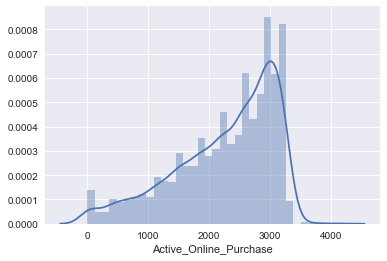

In [13]:
sns.distplot(data_f['Active_Online_Purchase'])

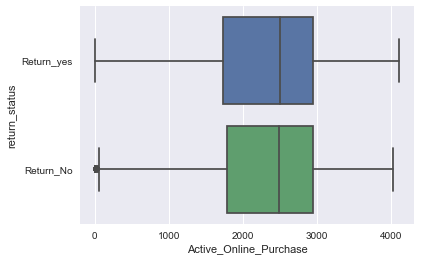

In [14]:
sns.boxplot(x='Active_Online_Purchase',y='return_status',data=data_f)

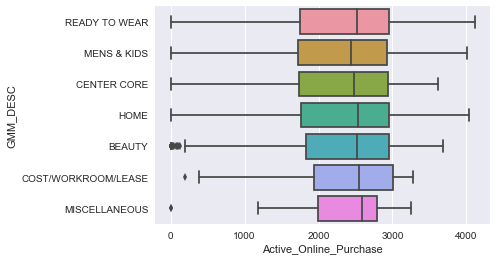

In [137]:
sns.boxplot(x='Active_Online_Purchase',y='GMM_DESC',data=data_f)

In [146]:
#sns.barplot(x='ONLN_PURCH_AMT',y='PROD_TYP_DESC',data=data_f)

In [145]:
#plt.figure(figsize=(20,20))
#g=sns.FacetGrid(data=data_f,col='GMM_DESC',row='return_status')
#g.map(sns.distplot,'prc_chg_dollar')

In [97]:

numeric_col=['prc_old','qty_old','prc_chg_dollar','ONLN_PURCH_AMT','time_to_new_purchase','Active_Online_Purchase','RFM_SCR_NBR','TOT_ACCT_CNT']

categorical_col=['KEPT_ACCT_TYP_CD',
                 'DIST_TO_STR_RESID_NBR','PROP_ACCT_CNT','NON_PROP_ACCT_CNT','LTY_ACCT_CNT',
                'CURR_DH_MY_LIFE_CD','CURR_DH_MY_LIFE_DESC','PREV_DH_MY_LIFE_CD','CURR_DH_SHOP_HABIT_CD','PREV_DH_SHOP_HABIT_CD','DH_SHOP_HABIT_CHNG_1_MNTH_CD',
                'DH_SHOP_HABIT_CHNG_3_MNTH_CD','DH_SHOP_HABIT_CHNG_6_MNTH_CD','MAX_STAR_RISSUE_VIP_CD','DIGIT_RECD_IND',
                'OPT_IN_EMAIL_IND','RGSTRNT_IND','PLENTI_IND','R_SCR_NBR','F_SCR_NBR','M_SCR_NBR','RFM_SEG_IND',
                 'MAX_STAR_RWD_SPND_LVL_CD','PREV_STAR_RWD_SPND_LVL_CD','CUR_OIS_CD']


ignore_col=['MSA_CD','NCOA_MOVE_TS','MOVE_TS','Prod','VND_NM','BRND_NM','BUYER_DESC','ETL_PRG_NM','FRST_NM','KEPT_SOURCE_CD_DESC','prc_chg_pct','KEPT_MASK_ACCT_ID','return_duration_from_recent_buy','INDIV_STR_LOC_CLASS_CD',
            'ETL_BATCH_ID','ETL_UPD_TS','ETL_CRT_TS','BEST_PHN_TYP_CD','SRC_SYS_ID','VLD_EMAIL_ADDR_IND','SUPPR_DMA_MAIL_IND',
            'SEC_NBR_NOT_FND_IND','SEASNL_IND','RTRN_MAIL_IND','NCOA_MOVE_TYP_CD','MISS_SECDRY_NBR_HIRIS_IND','LOT_CD',
            'LAT_LONG_LVL_CD','LONG_NBR','LAT_NBR','FIPS_STT_CD','FIPS_PLACE_CD','FIPS_MIN_CVL_DIVN_CD','FIPS_CNTY_CD','r_qty_old',
            'DPB_NBR','DLVR_SEQ_FILE_DLVR_TYP_CD','CUST_SEC_IND','CNSS_TRACT_TXT','CNSS_PLACE_CD','CNSS_TRACT_CD',
            'CNSS_MIN_CVL_DIVN_CD','CNSS_BLOCK_GRP_CD','CMPND_GRP_CD','CBSA_CD','CARR_RTE_CD','BEST_EMAIL_SRC_EMAIL_ADDR_TXT','r_amt_old',
            'BEST_EMAIL_ADDR_TXT','BEST_PHN_SRC_PHN_NBR','BEST_PHN_NBR','OUTLET_SMS_IND','ADDR_UPD_TS','ADDR_UPD_NCOA_TS','amt_old',
            'CNTRY_CD','PROV_CD','ZIP_CD','ADDR_LN_2_TXT','ADDR_LN_1_TXT','ALT_LANG_CD','EMP_IND','EMP_CD','BIRTH_MNTH_CD',
            'TTL_DESC','MDDL_NM','MDDL_INIT_NM','LST_NM','LBL_NM','MDSE_DEPT_DESC','PROD_DESC','web_prod_id','LST_GIFT_PURCH_DT',
           'FRST_REG_DT','INDIV_STR_LOC_CLASS_CD','STR_LOC_CLASS_CD','OUTLET_LST_PURCH_DT','OUTLET_STR_LOYAL_LOC_CD','OUTLET_CLST_STR_LOC_CD','OUTLET_STR_LOC_CLASS_CD',
            'OUTLET_DIST_TO_STR_RESID_NBR','PROP_ACCT_CNT','DH_MY_LF_CD_LOAD_TS','CURR_DH_SHOP_HABIT_DESC','DH_SHOP_HABIT_LOAD_TS','LTY_LVL_DESC',
            'MAX_VIP_CD','MAX_VIP_CD_DESC','MAX_VIP_MAJ_CD','MAX_VIP_PRTY_CD','NIXIE_CD','RTL_DIVN_CD','PRSNX_CD','PLENTI_SITE_PROF_CRT_TS',
            'PLENTI_SITE_PROF_IND','SRC_SYS_ID_x','ETL_CRT_TS_x','ETL_UPD_TS_x','INDIV_ID_TYP_CD','MAX_STAR_RWD_SPND_LVL_DESC','PREV_STAR_RWD_SPND_LVL_DESC',
            'CUR_OIS_DESC','PREV_OIS_CD','PREV_OIS_DESC','prc_chg_pct','prc_chg_per_day','return_duration_from','ETL_CRT_TS_y','ETL_UPD_TS_y']
            
            
#cat_remove=['ONLN_PURCH_CNT','INDIV_CLST_STR_LOC_CD','INDIV_STR_LOYAL_LOC_CD','PRSPCT_ACCT_CNT','ETL_BATCH_ID_x','ETL_PRG_NM_x','STR_LOYAL_LOC_CD','CLST_STR_LOC_CD','PRIZM_CD']         
#categorical_col.remove(cat_remove)


In [98]:
Dates_col=['buy_dt_old','r_dt_old','buy_dt_new','r_dt_new','FRST_PURCH_DT','ONLN_FRST_PURCH_DT','ONLN_LST_PURCH_DT','DOB_DT',
           'EXT_ONLN_FRST_PURCH_DT','STR_FRST_PURCH_DT','STR_LST_PURCH_DT','INDIV_LST_PURCH_DT','LST_PURCH_DT']
ID_Col=['INDIV_ID','HHLD_ID','cid','upc','KEPT_ACCT_ID','oid_old','oid_new']
ignore_col.extend(Dates_col)
ignore_col.extend(ID_Col)
predictors=[col for col in data_f.columns if col not in ignore_col]

In [ ]:
############################## plots #############################3

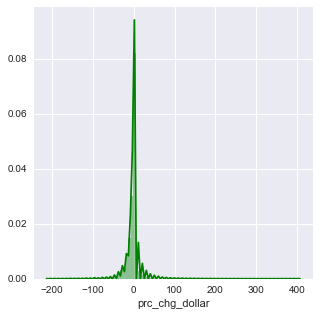

In [96]:
plt.figure(figsize=(5, 5))
sns.distplot(data_f['prc_chg_dollar'], color='g', bins=100, hist_kws={'alpha': 0.4});## Distribution plot of prc_chg_dollar ##

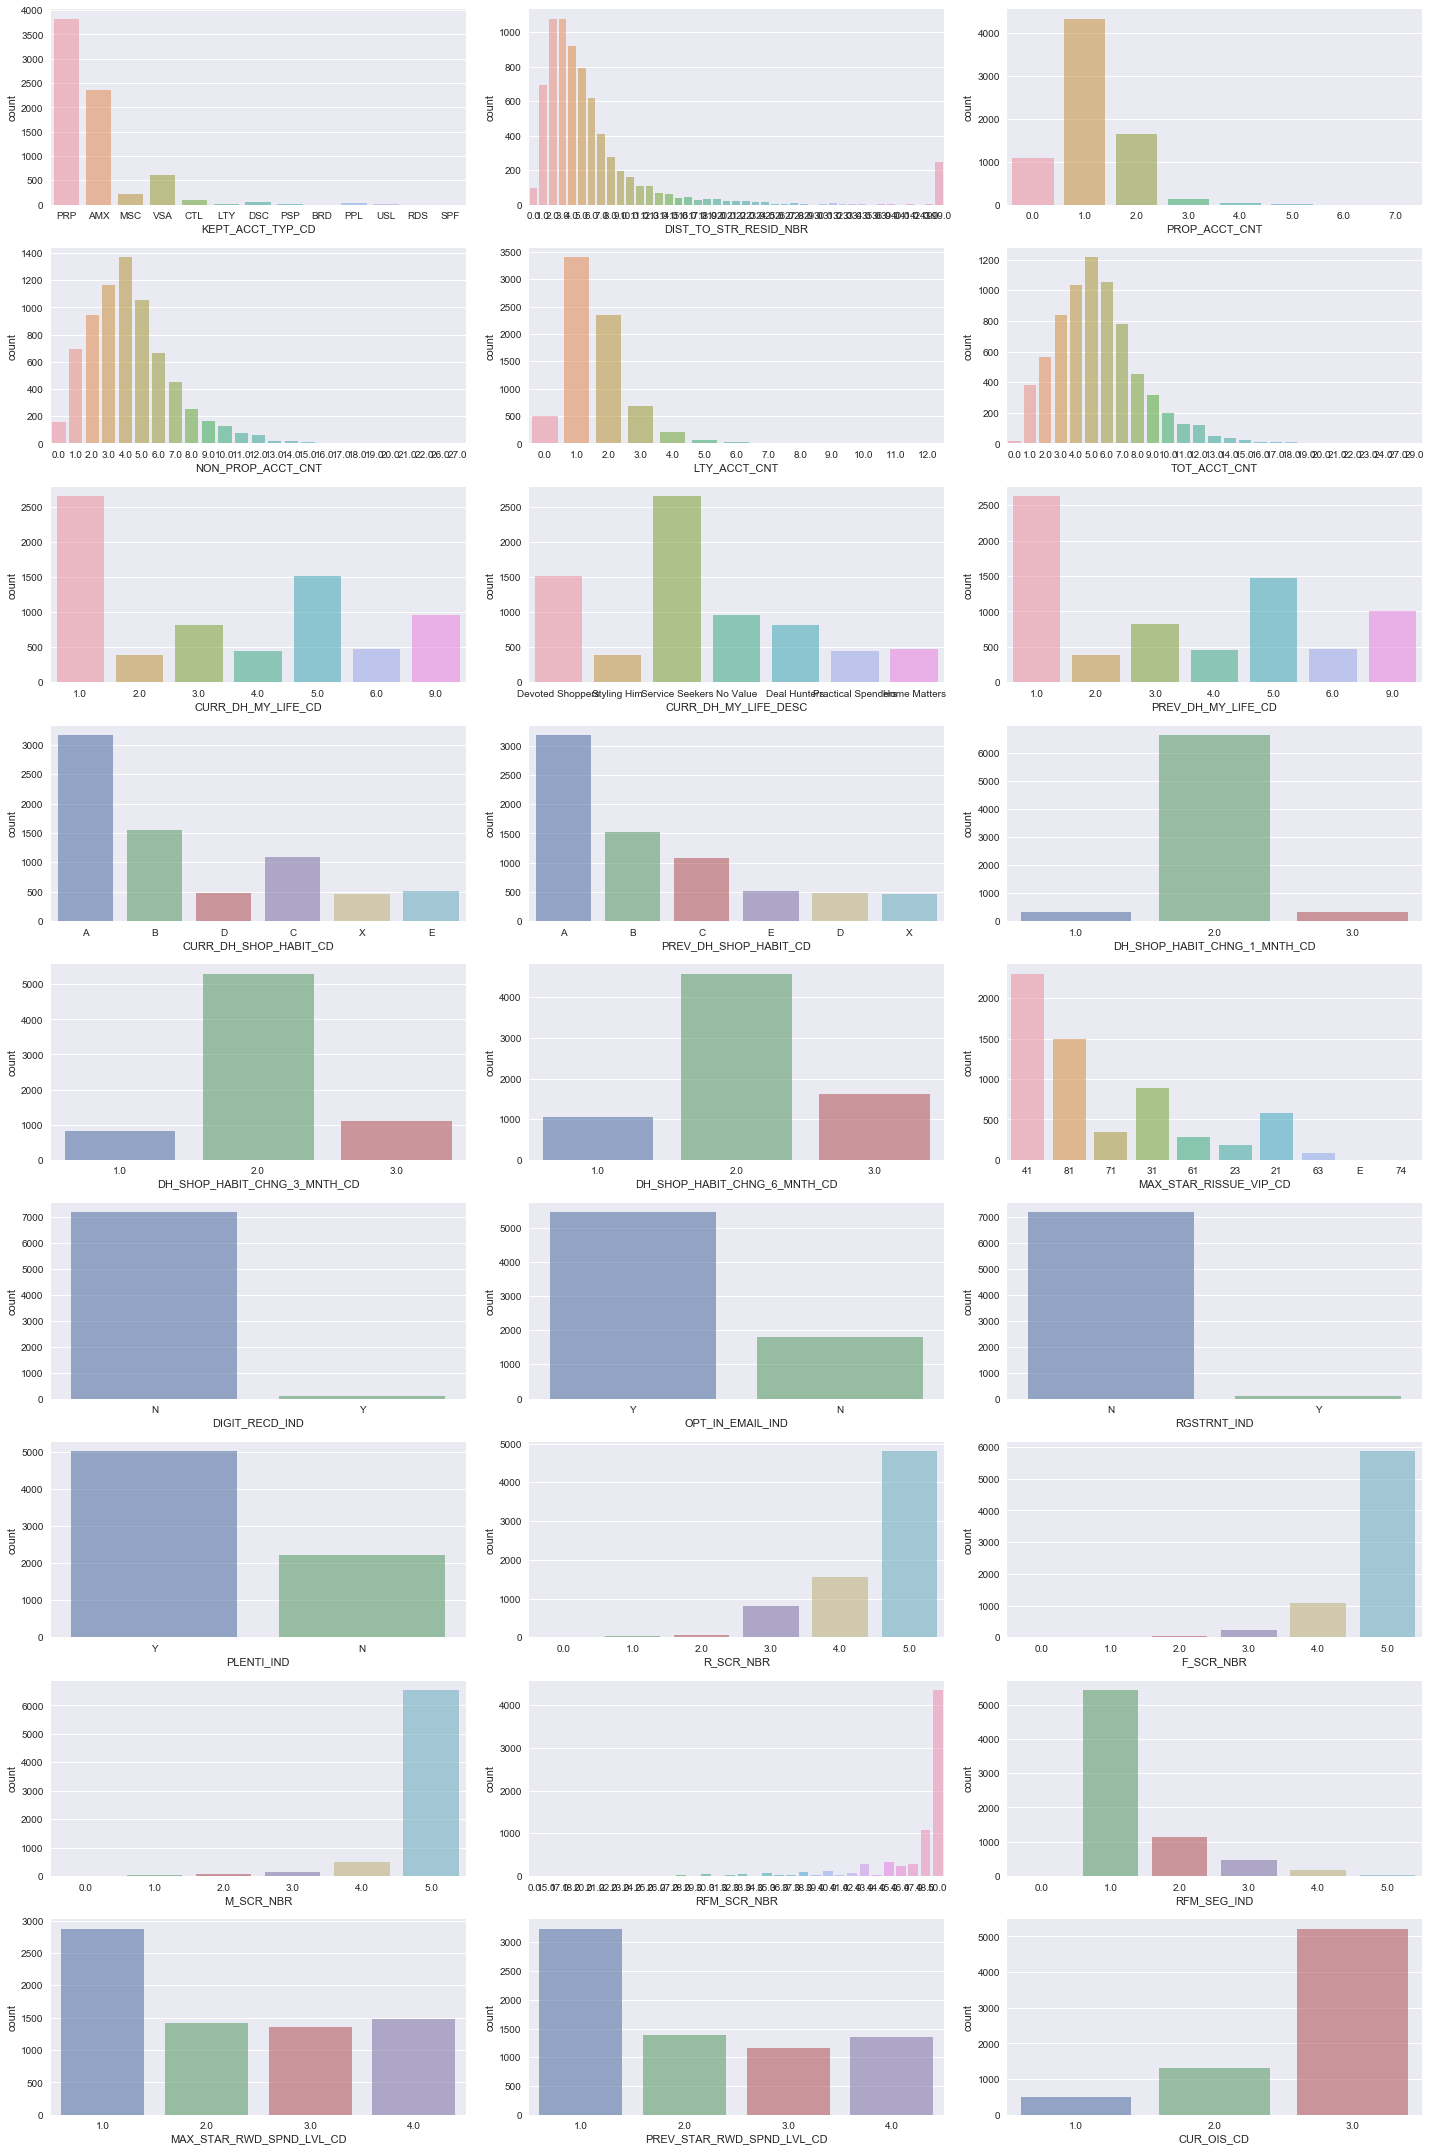

In [101]:
#### Distribution plots ####
fig, axes = plt.subplots(round(len(data_f[categorical_col].columns) / 3), 3, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(data_f[categorical_col].columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
        sns.countplot(x=data_f[categorical_col].columns[i], alpha=0.6, data=data_f[categorical_col], ax=ax)

fig.tight_layout()



  ########################## Correlation #################################

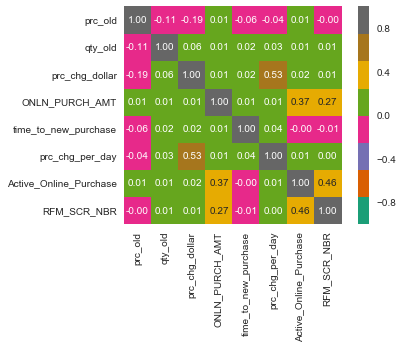

In [47]:
cols=['prc_old','qty_old','prc_chg_dollar','ONLN_PURCH_AMT','time_to_new_purchase','prc_chg_per_day','Active_Online_Purchase','RFM_SCR_NBR']
corr_matrix = data_f[cols].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=cols,xticklabels=cols,cmap='Dark2')

In [ ]:
#######################################3 PCA ######################################

In [99]:
data_f[predictors].shape

(7245, 80)

#### Check %NA's in data

In [106]:
total=data_f[predictors].isnull().sum().sort_values(ascending=False)
percent=(data_f[predictors].isnull().sum()/data_f[predictors].isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)
                       


,Total,Percent
r_amt_new,5133,0.708489
r_qty_new,5133,0.708489
ERCPT_CD,1153,0.159144
MAX_STAR_RISSUE_VIP_CD,1090,0.150449
CUR_OIS_CD,223,0.030780
PARENT_MDSE_DIVN_DESC,109,0.015045
GMM_DESC,109,0.015045
PROD_TYP_DESC,109,0.015045
MAX_STAR_RWD_SPND_LVL_CD,103,0.014217
PREV_STAR_RWD_SPND_LVL_CD,103,0.014217


In [101]:
data=data_f[predictors]

In [104]:
data['r_amt_new']=data['r_amt_new'].fillna(value=0)
data['r_qty_new']=data['r_qty_new'].fillna(value=0)

In [111]:
data['ERCPT_CD']=data['ERCPT_CD'].fillna(value=data['ERCPT_CD'].mode())
data['MAX_STAR_RISSUE_VIP_CD']=data['MAX_STAR_RISSUE_VIP_CD'].fillna(value=data['MAX_STAR_RISSUE_VIP_CD'].mode())
data['CUR_OIS_CD']=data['CUR_OIS_CD'].fillna(value=data['CUR_OIS_CD'].mode())
data['PARENT_MDSE_DIVN_DESC']=data['PARENT_MDSE_DIVN_DESC'].fillna(value=data['PARENT_MDSE_DIVN_DESC'].mode())
data['GMM_DESC']=data['GMM_DESC'].fillna(value=data['GMM_DESC'].mode())
data['PROD_TYP_DESC']=data['PROD_TYP_DESC'].fillna(value=data['PROD_TYP_DESC'].mode())

In [116]:
##### define function to replace na- values
nan_mode=['MAX_STAR_RWD_SPND_LVL_CD','PREV_STAR_RWD_SPND_LVL_CD']
for col in nan_mode:
    data[col]=data[col].fillna(value=data[col].mode())

In [117]:
data['PREV_STAR_RWD_SPND_LVL_CD'].isnull().sum()


103

In [91]:
#ALT_LANG_CD -- apply mode values (missing data)
#ERCPT_CD -- apply mode 
## MAX_STAR_RISSUE_VIP_CD - apply mode
## CUR_OIS_CD -- apply mode 
## GMM_DESC -- apply mode
## PARENT_MDSE_DIVN_DESC	 -- apply mode
## PROD_TYP_DESC	 -- apply mode
## PREV_STAR_RWD_SPND_LVL_CD -- apply mode
## MAX_STAR_RWD_SPND_LVL_CD	 -- apply mode
## ACCT_ADDR_RECD_TYP_CD -- aply mode
## AFLT_IND -- apply mode
## CITY_NM	


In [95]:
### What is "ADDR_UPD_TS ? ##
## Removed DOB_DT also ##
#ignore_col=['PLENTI_SITE_PROF_CRT_TS','OUTLET_DIST_TO_STR_RESID_NBR','INDIV_STR_LOC_CLASS_CD','OUTLET_SMS_IND','MSA_CD','STR_LOC_CLASS_CD','OUTLET_LST_PURCH_DT','OUTLET_STR_LOYAL_LOC_CD','CNSS_PLACE_CD','OUTLET_STR_LOC_CLASS_CD','OUTLET_CLST_STR_LOC_CD','MDDL_INIT_NM','LTY_LVL_DESC','PREV_OIS_DESC','PREV_OIS_CD',
 #          'PRSNX_CD','CNSS_MIN_CVL_DIVN_CD','NCOA_MOVE_TYP_CD','NCOA_MOVE_TS','ADDR_UPD_NCOA_TS','ADDR_LN_2_TXT','MOVE_TS','Prod','r_dt_new','LST_GIFT_PURCH_DT','r_dt_old','MDDL_NM','BEST_EMAIL_SRC_EMAIL_ADDR_TXT','BEST_EMAIL_ADDR_TXT','ADDR_UPD_TS','FRST_REG_DT','DOB_DT','BIRTH_MNTH_CD','EMP_CD']